# Hypothesis Testing

A golf ball manufacturer decides to increase the strength of its balls. For this, he adds a layer to his balls. The resistance test for the new balls is satisfactory and the new balls have more resistance than the previous balls, but before the mass production, one of the researchers of this company claims that the new balls travel a shorter distance than the previous balls. For this purpose, he threw the balls 40 times in different conditions with a device so that the only difference between the two throws was the type of balls. To prove his claim, this researcher asked for your help by using the permutation test. For this, first, read the data set including the performance of the current and new balls from the golf.csv file:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import permutation_test

df = pd.read_csv("/content/drive/MyDrive/Data Scientist/Statistics/Hypothesis Testing/golf.csv")
df.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


In [3]:
df.describe()

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


In the data, the first column represents the current performance of the balls while the second column represents the performance of the new balls. To determine the difference in the average performance between the two types of balls, calculate the mean of each column and compare them.

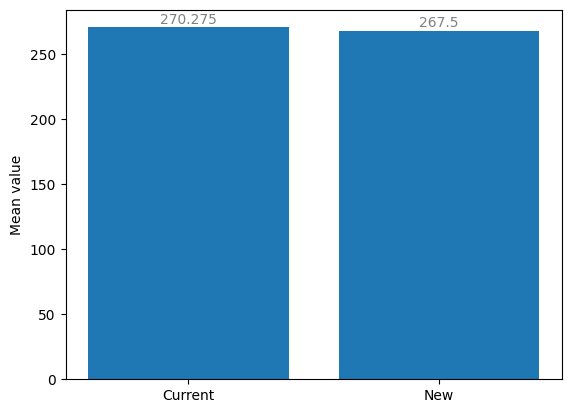

In [4]:
current_mean = df['Current'].mean()
new_mean = df['New'].mean()
values = [current_mean, new_mean]

plt.bar(['Current', 'New'], values)
plt.ylabel('Mean value')

for i, v in enumerate(values):
    plt.text(i, v+3, str(v), ha='center', color='gray')

plt.show()

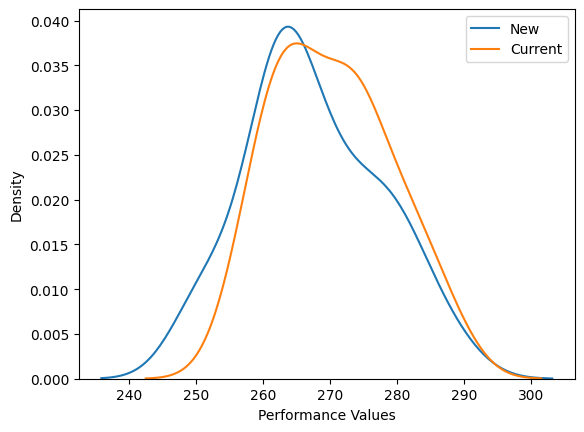

In [5]:
sns.kdeplot(df['New'], label='New')
sns.kdeplot(df['Current'], label='Current').set_xlabel('Performance Values')
plt.legend()

Use the permutation test between the new balls' performance and the old ones' performance. Calculate the p-value. Is the null hypothesis rejected?


In [6]:
################################################################################
# first, we need to define our statistic                                       #
# here, we subtract means                                                      #
#                                                                              #
# H0: the performance of new balls does not change                             #
# H1: the performance of new balls are better                                  #
################################################################################

def statistic(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)

result = permutation_test((df['New'], df['Current']), statistic,
                        vectorized=True, n_resamples=200000, alternative='less')

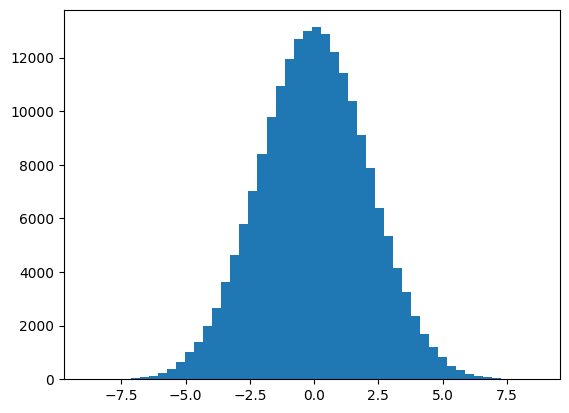

In [7]:
plt.hist(result.null_distribution, bins=50);

P-value in permutation test:   
$$ \frac{Σ(permutation-test-statistic > observed-test-statistic)}{number-of-permutations} $$

In [8]:
result.pvalue

0.09588452057739712

level of significance:   0.05

p-value: 0.09

because 0.09 > 0.05 --> we accept H0


Is the permeation test a proper test for our purpose? If you believe it is, explain why or suggest another method or test for the problem.

**permutation is a proper test when the number of samples is too low. Due to this, we are not confident about the distribution of the main population. So, a non-parametric test like this one can be a good choice.**